<a href="https://colab.research.google.com/github/cmlakin/Machine-Learning-Final-Project----Lakin-Corrina/blob/main/MLFP_Lakin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
# from datetime import timedelta
from google.colab import files
import matplotlib.pyplot as plt

!ls
df = pd.read_excel('/content/Nashville_housing_data_2013_2016.xlsx')
df

Nashville_housing_data_2013_2016.xlsx  sample_data


,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,NASHVILLE,2013-01-24,132000,20130128-0008725,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,191500,20130118-0006337,No,...,134400.0,168300.0,1149.0,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,202000,20130124-0008033,No,...,157800.0,191800.0,2090.0,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,32000,20130128-0008863,No,...,243700.0,268700.0,2145.0,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,102000,20130131-0009929,No,...,138100.0,164800.0,1969.0,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,56631,56631,093 13 0B 274.00,RESIDENTIAL CONDO,320 11TH AVE S,NASHVILLE,2016-10-06,210000,20161007-0106599,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,56632,56632,093 13 0D 044.00,RESIDENTIAL CONDO,700 12TH AVE S,NASHVILLE,2016-10-25,338000,20161101-0115186,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,56633,56633,093 13 0D 048.00,RESIDENTIAL CONDO,700 12TH AVE S,NASHVILLE,2016-10-04,742000,20161010-0106889,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,56634,56634,093 13 0D 056.00,RESIDENTIAL CONDO,700 12TH AVE S,NASHVILLE,2016-10-26,320000,20161031-0114730,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cdf = df.copy()
cdf = cdf.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID','Legal Reference', 'Grade', 'Sold As Vacant'], axis=1)
cdf = cdf.drop(['Multiple Parcels Involved in Sale', 'Owner Name', 'Tax District','Neighborhood', 'image'], axis=1)
cdf = cdf.dropna()
cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath
1,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,191500,1802 STEWART PL,NASHVILLE,TN,0.17,32000.0,134400.0,168300.0,1149.0,PT BSMT,1941.0,BRICK,2.0,1.0,0.0
2,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,202000,2761 ROSEDALE PL,NASHVILLE,TN,0.11,34000.0,157800.0,191800.0,2090.0,SLAB,2000.0,BRICK/FRAME,3.0,2.0,1.0
3,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,32000,224 PEACHTREE ST,NASHVILLE,TN,0.17,25000.0,243700.0,268700.0,2145.0,FULL BSMT,1948.0,BRICK/FRAME,4.0,2.0,0.0
4,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,102000,316 LUTIE ST,NASHVILLE,TN,0.34,25000.0,138100.0,164800.0,1969.0,CRAWL,1910.0,FRAME,2.0,1.0,0.0
5,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,2013-01-04,93736,2626 FOSTER AVE,NASHVILLE,TN,0.17,25000.0,86100.0,113300.0,1037.0,CRAWL,1945.0,FRAME,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,SINGLE FAMILY,5004 SUNSHINE DR,ANTIOCH,2016-10-26,214000,5004 SUNSHINE DR,ANTIOCH,TN,0.27,25000.0,142400.0,167400.0,2421.0,SLAB,1996.0,BRICK/FRAME,3.0,3.0,0.0
56607,SINGLE FAMILY,4964 HICKORY WOODS E,ANTIOCH,2016-10-28,236000,4964 HICKORY WOODS E,ANTIOCH,TN,0.23,25000.0,159300.0,184300.0,3117.0,SLAB,1995.0,BRICK/FRAME,3.0,3.0,0.0
56614,SINGLE FAMILY,1625 5TH AVE N,NASHVILLE,2016-10-28,466000,1625 5TH AVE N,NASHVILLE,TN,0.15,40000.0,204100.0,256000.0,1637.0,CRAWL,2004.0,FRAME,3.0,2.0,1.0
56615,SINGLE FAMILY,1614 5TH AVE N,NASHVILLE,2016-10-26,685000,1614 5TH AVE N,NASHVILLE,TN,0.19,40000.0,295900.0,351600.0,2478.0,CRAWL,2005.0,FRAME,4.0,3.0,1.0


In [36]:
cdf = cdf.sort_values(by='Bedrooms', ascending=False)
cdf = cdf.drop(cdf.index[23970:])
cdf = cdf.sort_values(by='Acreage', ascending=True)
cdf = cdf.drop(cdf.index[23900:])
cdf = cdf.sort_values(by='Finished Area', ascending=True)
cdf['Finished Area'] = cdf['Finished Area'].astype(int)
cdf = cdf.drop(cdf.index[20086:])
cdf = cdf.sort_values(by='Sale Price', ascending=True)
cdf = cdf.drop(cdf.index[12600:])
cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath
245,SINGLE FAMILY,4021 DUMBARTON DR,NASHVILLE,2013-01-04,100,4021 DUMBARTON DR,NASHVILLE,TN,0.78,25000.0,94300.0,119300.0,1620,FULL BSMT,1958.0,BRICK,2.0,1.0,0.0
8894,SINGLE FAMILY,2415 STIVERS ST,NASHVILLE,2013-10-15,100,2415 STIVERS ST,NASHVILLE,TN,0.39,16200.0,39300.0,57100.0,1134,CRAWL,1920.0,FRAME,2.0,1.0,0.0
54859,SINGLE FAMILY,1228 LILLIAN ST,NASHVILLE,2016-09-09,800,1228 LILLIAN ST,NASHVILLE,TN,0.16,85000.0,160700.0,252400.0,1544,FULL BSMT,1948.0,FRAME,3.0,2.0,0.0
17359,SINGLE FAMILY,108 BLUE MIST CT,NASHVILLE,2014-06-27,1000,108 BLUE MIST CT,NASHVILLE,TN,0.48,27000.0,139900.0,166900.0,1911,CRAWL,1968.0,BRICK,3.0,2.0,0.0
8845,SINGLE FAMILY,46 TWIN ST,NASHVILLE,2013-10-11,3000,46 TWIN ST,NASHVILLE,TN,0.11,16200.0,145100.0,161300.0,1412,CRAWL,2014.0,FRAME,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4619,SINGLE FAMILY,1141 GREENFIELD AVE,NASHVILLE,2013-06-27,200000,1141 GREENFIELD AVE,NASHVILLE,TN,0.34,40000.0,234600.0,282000.0,2205,PT BSMT,1924.0,BRICK,2.0,2.0,0.0
13037,ZERO LOT LINE,106 B 38TH AVE N,NASHVILLE,2014-03-31,200000,106 B 38TH AVE N,NASHVILLE,TN,0.09,105000.0,58600.0,163600.0,1116,CRAWL,1985.0,BRICK/FRAME,2.0,1.0,1.0
39628,SINGLE FAMILY,521 S 13TH ST,NASHVILLE,2015-10-06,200000,521 S 13TH ST,NASHVILLE,TN,0.22,30000.0,401500.0,444300.0,2205,CRAWL,1930.0,FRAME,3.0,2.0,1.0
7945,SINGLE FAMILY,4402 ILLINOIS AVE,NASHVILLE,2013-09-20,200000,4402 ILLINOIS AVE,NASHVILLE,TN,0.14,50000.0,145700.0,195700.0,1297,CRAWL,1930.0,FRAME,3.0,2.0,0.0


In [37]:
cdf['Land_Use'] = cdf['Land Use']

cdf = cdf[cdf.Land_Use != 'CHURCH']
cdf = cdf[cdf.Land_Use != 'DAY CARE CENTER']
cdf = cdf[cdf.Land_Use != 'DORMITORY/BOARDING HOUSE']
cdf = cdf[cdf.Land_Use != 'NON-PROFIT CHARITABLE SERVICE']
cdf = cdf[cdf.Land_Use != 'OFFICE BLDG (ONE OR TWO STORIES)']
cdf = cdf[cdf.Land_Use != 'PARSONAGE']
cdf = cdf[cdf.Land_Use != 'SPLIT CLASS']
cdf = cdf[cdf.Land_Use != 'ZERO LOT LINE']
cdf = cdf[cdf.Land_Use != 'MOBILE HOME']
cdf = cdf[cdf.Land_Use != 'RESIDENTIAL COMBO/MISC']
cdf = cdf[cdf.Land_Use != 'VACANT RES LAND']
cdf = cdf[cdf.Land_Use != 'VACANT RESIDENTIAL LAND']

cdf

,Land Use,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath,Land_Use
245,SINGLE FAMILY,4021 DUMBARTON DR,NASHVILLE,2013-01-04,100,4021 DUMBARTON DR,NASHVILLE,TN,0.78,25000.0,94300.0,119300.0,1620,FULL BSMT,1958.0,BRICK,2.0,1.0,0.0,SINGLE FAMILY
8894,SINGLE FAMILY,2415 STIVERS ST,NASHVILLE,2013-10-15,100,2415 STIVERS ST,NASHVILLE,TN,0.39,16200.0,39300.0,57100.0,1134,CRAWL,1920.0,FRAME,2.0,1.0,0.0,SINGLE FAMILY
54859,SINGLE FAMILY,1228 LILLIAN ST,NASHVILLE,2016-09-09,800,1228 LILLIAN ST,NASHVILLE,TN,0.16,85000.0,160700.0,252400.0,1544,FULL BSMT,1948.0,FRAME,3.0,2.0,0.0,SINGLE FAMILY
17359,SINGLE FAMILY,108 BLUE MIST CT,NASHVILLE,2014-06-27,1000,108 BLUE MIST CT,NASHVILLE,TN,0.48,27000.0,139900.0,166900.0,1911,CRAWL,1968.0,BRICK,3.0,2.0,0.0,SINGLE FAMILY
8845,SINGLE FAMILY,46 TWIN ST,NASHVILLE,2013-10-11,3000,46 TWIN ST,NASHVILLE,TN,0.11,16200.0,145100.0,161300.0,1412,CRAWL,2014.0,FRAME,3.0,2.0,0.0,SINGLE FAMILY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52148,SINGLE FAMILY,1304 PORTER RD,NASHVILLE,2016-07-22,200000,1304 PORTER RD,NASHVILLE,TN,0.26,25000.0,74900.0,99900.0,1906,FULL BSMT,1950.0,BRICK,3.0,1.0,0.0,SINGLE FAMILY
4619,SINGLE FAMILY,1141 GREENFIELD AVE,NASHVILLE,2013-06-27,200000,1141 GREENFIELD AVE,NASHVILLE,TN,0.34,40000.0,234600.0,282000.0,2205,PT BSMT,1924.0,BRICK,2.0,2.0,0.0,SINGLE FAMILY
39628,SINGLE FAMILY,521 S 13TH ST,NASHVILLE,2015-10-06,200000,521 S 13TH ST,NASHVILLE,TN,0.22,30000.0,401500.0,444300.0,2205,CRAWL,1930.0,FRAME,3.0,2.0,1.0,SINGLE FAMILY
7945,SINGLE FAMILY,4402 ILLINOIS AVE,NASHVILLE,2013-09-20,200000,4402 ILLINOIS AVE,NASHVILLE,TN,0.14,50000.0,145700.0,195700.0,1297,CRAWL,1930.0,FRAME,3.0,2.0,0.0,SINGLE FAMILY


In [38]:
cdf['Sale Price'] = cdf['Sale Price'].astype(float)
cdf.dtypes

Land Use                    object
Property Address            object
Property City               object
Sale Date           datetime64[ns]
Sale Price                 float64
Address                     object
City                        object
TN                          object
Acreage                    float64
Land Value                 float64
Building Value             float64
Total Value                float64
Finished Area                int64
Foundation Type             object
Year Built                 float64
Exterior Wall               object
Bedrooms                   float64
Full Bath                  float64
Half Bath                  float64
Land_Use                    object
dtype: object

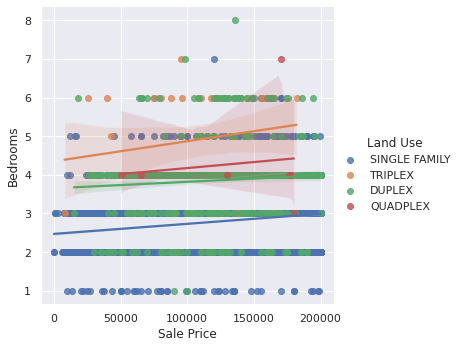

In [39]:
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize': (13, 9)})
sns.lmplot(data = cdf, y='Bedrooms', x='Sale Price', hue='Land Use')

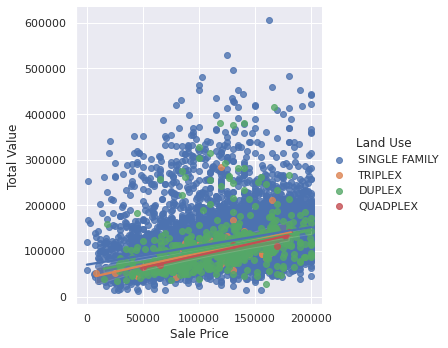

In [42]:
# cdf.plot(kind = 'scatter', x = 'Sale Price', y = 'Finished Area', hue='Land Use')

# plt.show()

sns.lmplot(data = cdf, y='Total Value', x='Sale Price',  hue='Land Use')
# sns.lmplot(data = cdf, x='home_team_id', y='outcome', hue='type')

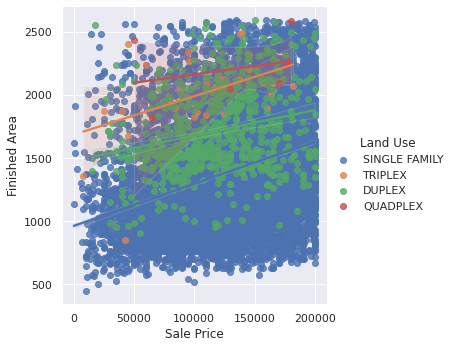

In [43]:
sns.lmplot(data = cdf, y='Finished Area', x='Sale Price',  hue='Land Use')

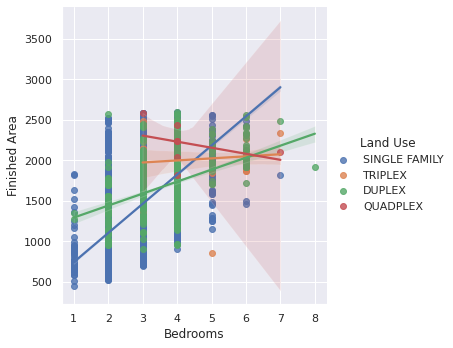

In [44]:
sns.lmplot(data = cdf, y='Finished Area', x='Bedrooms',  hue='Land Use')

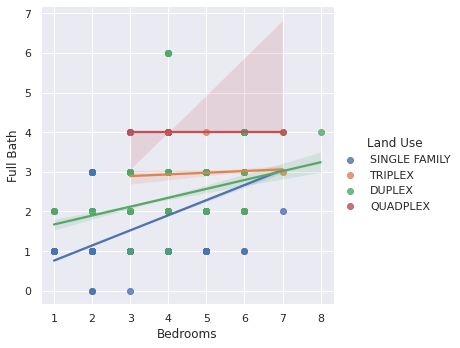

In [46]:
sns.lmplot(data = cdf, y='Full Bath', x='Bedrooms',  hue='Land Use')